# Explore correlations between metabolite profiles and QTL LOD scores

Can correlations be used as a way to group observations to increase power?

In [80]:
options(repr.plot.width = 6)
options(repr.plot.height = 5)

In [66]:
library(ggplot2);
library(plyr);
library(dplyr);
library(reshape2);
library(LSD);
library(qtl);
library(pheatmap);
library(funqtl);
library(parallel);
options(mc.cores = 24);
library(snow);
library(igraph);
library(stringr);

## Load metabolite data

Use log2 abundance. Compute pearson correlation between all pairs of metabolites across all timepoints and strains

In [77]:
endo_f = "/g/steinmetz/project/GenPhen/data/endometabolome/data/endometabolite_full_12102015.rda"
load(endo_f)
endo_small = endometabolite %>% filter(time_format=="absolute", value.log2 > 0) %>% select(strain,metabolite,replicate,time,value.log2) 
m = unique(endo_small$metabolite)
endo_corr = do.call(rbind,lapply(m,function(i){
    do.call(cbind,lapply(m,function(j){
        d1 = tmp %>% filter(metabolite == i)
        d2 = tmp %>% filter(metabolite == j)
        d = merge(d1,d2,by=c("strain","time","replicate"))
        cor(d$value.log2.x,d$value.log2.y,use = "pairwise")
    }))
}))
rownames(endo_corr) = m
colnames(endo_corr) = m

## Load QTL profiles

Use log2 abundance. Compute pearson correlation between all pairs of metabolites across all timepoints and strains

In [83]:
devtools::source_url("https://raw.githubusercontent.com/scalefreegan/steinmetz-lab/master/mQTL_explorer/global.R")

SHA-1 hash of file is c7b1ec0096632e3a4863bcff8deaf6b8e431a905


[1] 0


ERROR: Error in library(clustQTL): there is no package called ‘clustQTL’


In [ ]:
cor_m = do.call(rbind, lapply(seq(1:length(mQTLs_combrep$qtls)),function(i){
        sapply(seq(1:length(mQTLs_combrep$qtls)),function(j){
                cor(mQTLs_combrep$qtls[[i]][,"lod"], mQTLs_combrep$qtls[[j]][,"lod"])
            })
    }))
rownames(cor_m) = names(mQTLs_combrep$qtls)
colnames(cor_m) = names(mQTLs_combrep$qtls)
pdf(gsub(".rda","_lod_timepointcor.pdf",f), width=11.5,height=8)
    pheatmap(cor_m,breaks=seq(-1, 1, length.out = 100), fontsize = 6, main = "Correlation LOD score, Metabolites/Timepoints" )
dev.off()

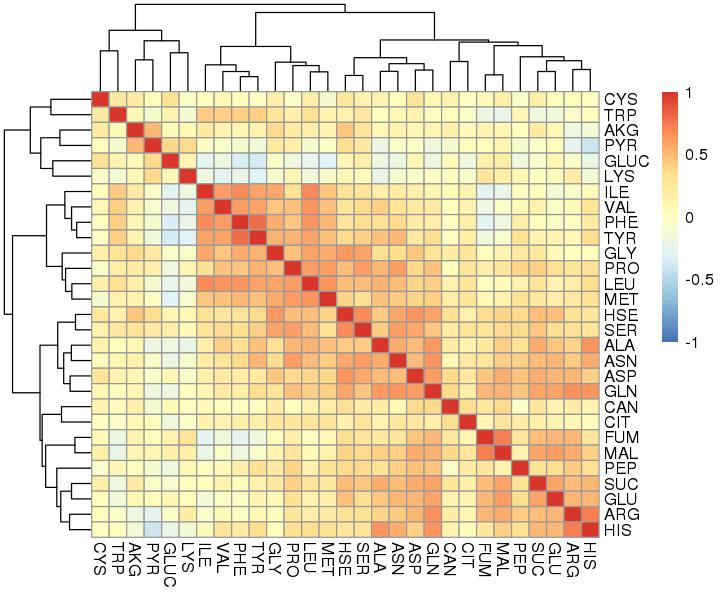

In [85]:
pheatmap(endo_corr,breaks=seq(-1,1,length.out=100))